<a href="https://colab.research.google.com/github/10points/gauge-reader/blob/main/Gauge_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import zipfile
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Extract train data
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/gauge_work/train.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
# Extract test data
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/gauge_work/test.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
# Check number of files in train set
for dirpath, dirnames, filenames, in os.walk("/content/content/train"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 20 directories and 0 images in /content/content/train
there are 0 directories and 6 images in /content/content/train/CP_boiler_2
there are 0 directories and 6 images in /content/content/train/BP_compressor_4
there are 0 directories and 12 images in /content/content/train/BP_compressor_3
there are 0 directories and 12 images in /content/content/train/BW_meter_1
there are 0 directories and 20 images in /content/content/train/BP_compressor_2
there are 0 directories and 8 images in /content/content/train/BP_compressor_1
there are 0 directories and 9 images in /content/content/train/CP_boiler_3
there are 0 directories and 9 images in /content/content/train/BP_boiler_3
there are 0 directories and 4 images in /content/content/train/CP_boiler_1
there are 0 directories and 9 images in /content/content/train/BP_boiler_5
there are 0 directories and 6 images in /content/content/train/BP_boiler_4
there are 0 directories and 9 images in /content/content/train/BW_meter_2
there are 0 directo

In [6]:
# Check number of files in test set
for dirpath, dirnames, filenames, in os.walk("/content/content/test"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 20 directories and 0 images in /content/content/test
there are 0 directories and 2 images in /content/content/test/CP_boiler_2
there are 0 directories and 2 images in /content/content/test/BP_compressor_4
there are 0 directories and 4 images in /content/content/test/BP_compressor_3
there are 0 directories and 4 images in /content/content/test/BW_meter_1
there are 0 directories and 5 images in /content/content/test/BP_compressor_2
there are 0 directories and 3 images in /content/content/test/BP_compressor_1
there are 0 directories and 3 images in /content/content/test/CP_boiler_3
there are 0 directories and 3 images in /content/content/test/BP_boiler_3
there are 0 directories and 2 images in /content/content/test/CP_boiler_1
there are 0 directories and 3 images in /content/content/test/BP_boiler_5
there are 0 directories and 2 images in /content/content/test/BP_boiler_4
there are 0 directories and 3 images in /content/content/test/BW_meter_2
there are 0 directories and 3 image

In [7]:
# Get class name
data_dir = pathlib.Path("/content/content/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['BE_meter' 'BF_meter' 'BP_boiler_1' 'BP_boiler_2' 'BP_boiler_3'
 'BP_boiler_4' 'BP_boiler_5' 'BP_compressor_1' 'BP_compressor_2'
 'BP_compressor_3' 'BP_compressor_4' 'BP_control' 'BT_meter' 'BW_meter_1'
 'BW_meter_2' 'CP_boiler_1' 'CP_boiler_2' 'CP_boiler_3' 'CP_compressor_1'
 'CP_compressor_2']


In [8]:
# Show random image function
def show_random_image(target_dir, target_class):
  target_folder = f"{target_dir}/{target_class}"

  random_img = random.sample(os.listdir(target_folder), 1)
  print(random_img)

  # plotting
  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['IMG_4308.jpg']
Image shape: (4032, 3024, 3)
['IMG_4145.jpg']
Image shape: (3024, 4032, 3)
['IMG_4159.jpg']
Image shape: (4032, 3024, 3)
['IMG_4174.jpg']
Image shape: (4032, 3024, 3)
['IMG_4191.jpg']
Image shape: (4032, 3024, 3)
['IMG_4206.jpg']
Image shape: (4032, 3024, 3)
['IMG_4211.jpg']
Image shape: (3024, 4032, 3)
['IMG_4249.jpg']
Image shape: (4032, 3024, 3)
['IMG_4270.jpg']
Image shape: (4032, 3024, 3)
['IMG_4291.jpg']
Image shape: (4032, 3024, 3)
['IMG_4300.jpg']
Image shape: (4032, 3024, 3)
['IMG_4236.jpg']
Image shape: (4032, 3024, 3)
['IMG_4226.jpg']
Image shape: (4032, 3024, 3)
['IMG_4128.jpg']
Image shape: (4032, 3024, 3)
['IMG_4138.jpg']
Image shape: (4032, 3024, 3)
['PXL_20220601_030343224.jpg']
Image shape: (3024, 4032, 3)
['PXL_20220601_030406292.jpg']
Image shape: (3024, 4032, 3)
['PXL_20220601_030657642.jpg']
Image shape: (4032, 3024, 3)
['PXL_20220601_031017671.jpg']
Image shape: (3024, 4032, 3)
['PXL_20220601_031012020.MP.jpg']
Image shape: (3024, 4032, 3)


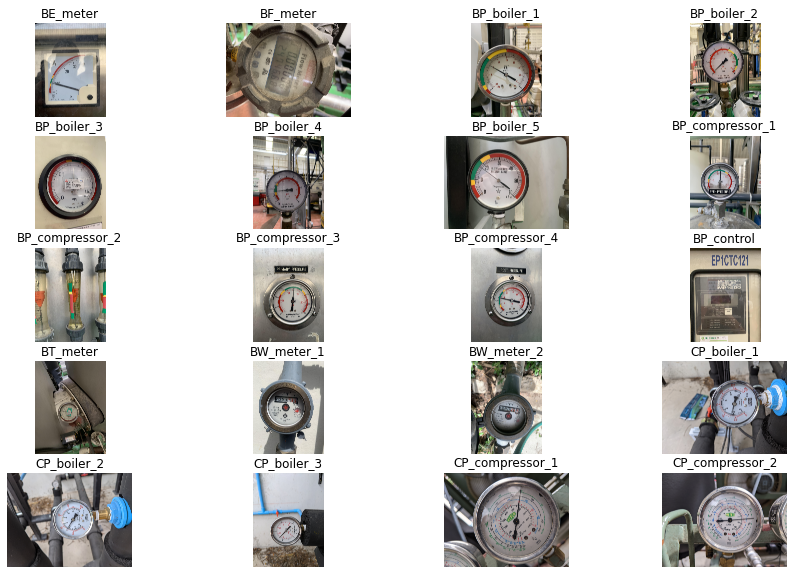

In [9]:
figsize=(15,10)
plt.figure(figsize=figsize)
for index, name in enumerate(class_names):
  # print(index, name)
  plt.subplot(5,4,index+1)
  show_random_image(target_dir="/content/content/train",
                    target_class=name)

## Preprocessing

In [10]:
# Create data generator and re scale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "/content/content/train"
test_dir = "/content/content/test"

# Load image data from directories into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 166 images belonging to 20 classes.
Found 54 images belonging to 20 classes.


In [11]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [12]:
# numbers of batches
len(train_data)

6

In [13]:
images[:2], images[0].shape

(array([[[[0.7607844 , 0.74509805, 0.7411765 ],
          [0.7803922 , 0.77647066, 0.7686275 ],
          [0.7725491 , 0.76470596, 0.7686275 ],
          ...,
          [0.3372549 , 0.33333334, 0.31764707],
          [0.30980393, 0.31764707, 0.29803923],
          [0.27450982, 0.29411766, 0.27058825]],
 
         [[0.8000001 , 0.7843138 , 0.7803922 ],
          [0.8117648 , 0.80392164, 0.81568635],
          [0.81568635, 0.8078432 , 0.82745105],
          ...,
          [0.3529412 , 0.3529412 , 0.3529412 ],
          [0.31764707, 0.31764707, 0.31764707],
          [0.3254902 , 0.3254902 , 0.31764707]],
 
         [[0.8000001 , 0.79215693, 0.80392164],
          [0.8000001 , 0.7960785 , 0.8196079 ],
          [0.7960785 , 0.79215693, 0.8117648 ],
          ...,
          [0.3137255 , 0.3137255 , 0.3137255 ],
          [0.30980393, 0.30980393, 0.30980393],
          [0.33333334, 0.33333334, 0.33333334]],
 
         ...,
 
         [[0.40000004, 0.39607847, 0.38823533],
          [0.38039

In [14]:
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [17]:
len(test_data)

2

##Modeling

1.Baseline

In [21]:
# Create the baseline model
model_1 = Sequential()
model_1.add(Conv2D(10, (3,3), input_shape=(224,224,3)))
model_1.add(Activation("relu"))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(len(class_names)))
model_1.add(Activation("softmax"))

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [22]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
6/6 [==============================] - 36s 6s/step - loss: 11.4625 - accuracy: 0.1205 - val_loss: 11.5262 - val_accuracy: 0.1296
Epoch 2/20
6/6 [==============================] - 32s 5s/step - loss: 7.5511 - accuracy: 0.2892 - val_loss: 5.1556 - val_accuracy: 0.2593
Epoch 3/20
6/6 [==============================] - 31s 5s/step - loss: 2.3140 - accuracy: 0.5904 - val_loss: 2.0356 - val_accuracy: 0.6296
Epoch 4/20
6/6 [==============================] - 31s 5s/step - loss: 0.3754 - accuracy: 0.9036 - val_loss: 0.8789 - val_accuracy: 0.8333
Epoch 5/20
6/6 [==============================] - 31s 5s/step - loss: 0.0582 - accuracy: 1.0000 - val_loss: 0.5982 - val_accuracy: 0.9074
Epoch 6/20
6/6 [==============================] - 31s 6s/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.5874 - val_accuracy: 0.8333
Epoch 7/20
6/6 [==============================] - 33s 6s/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.6461 - val_accuracy: 0.7778
Epoch 8/20
6/6 [================

In [23]:
# Plot the validation and training curve separately
def plot_loss_curve(history):
  """
  Returns separate loss curve for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) 

  # Plot loss 
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

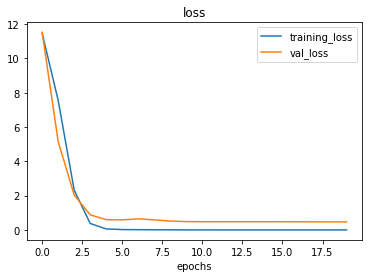

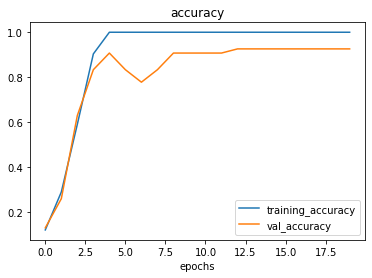

In [24]:
plot_loss_curve(history_1)